In [9]:
! pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [1]:
from typing import *

def _precision_recall_f1_from_tp_tpfp_tpfn(
    tp: int, tpfp: int, tpfn: int
) -> Tuple[float, float, float]:
    """
    Computing precision, recall and f1 score
    Args:
        tp: number of true positives
        tpfp: number of true positives + false positives
        tpfn: number of true positives + false negatives

    Returns:
        Precision, Recall and F1 score
    """
    precision, recall, f1_score = 0.0, 0.0, 0.0
    if tpfp:
        precision = tp / tpfp
    if tpfn:
        recall = tp / tpfn
    if precision and recall:
        f1_score = 2 * precision * recall / (precision + recall)
    return precision, recall, f1_score

def compute_precision_recall_f1_topk(
    gold_substitutes: List[str],
    pred_substitutes: List[str],
    topk_list: List[int] = (1, 3, 10),
) -> Dict[str, float]:
    """
    Method for computing k-metrics for each k in the input 'topk_list'.

    Args:
        gold_substitutes: Gold substitutes provided by human annotators.
        pred_substitutes: Predicted substitutes.
        topk_list: List of integer numbers for metrics.
        For example, if 'topk_list' equal to [1, 3, 5], then there will calculating the following metrics:
            ['Precion@1', 'Recall@1', 'F1-score@1',
             'Precion@3', 'Recall@3', 'F1-score@3',
             'Precion@5', 'Recall@5', 'F1-score@5']

    Returns:
        Dictionary that maps k-values in input 'topk_list' to computed Precison@k, Recall@k, F1@k metrics.
    """
    print(gold_substitutes)
    print(pred_substitutes)
    k_metrics = OrderedDict()
    golds_set = set(gold_substitutes)
    for topk in topk_list:
        if topk > len(pred_substitutes) or topk <= 0:
            raise ValueError(f"Couldn't take top {topk} from {len(pred_substitutes)} substitues")

        topk_pred_substitutes = pred_substitutes[:topk]

        true_positives = sum(1 for s in topk_pred_substitutes if s in golds_set)
        precision, recall, f1_score = _precision_recall_f1_from_tp_tpfp_tpfn(
            true_positives,
            len(topk_pred_substitutes),
            len(gold_substitutes)
        )
        k_metrics[f"prec@{topk}"] = precision
        k_metrics[f"rec@{topk}"] = recall
        k_metrics[f"f1@{topk}"] = f1_score
    return k_metrics


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\science\lexsubgen\debug\lexsub-all-models\fr_xlmr1\results.csv")
df

,target_word,target_lemma,target_pos_tag,target_position,context,gap,gap_normalized,gap_vocab_normalized,precision,recall,...,f1@3,prec@10,rec@10,f1@10,gold_substitutes,gold_weights,pred_substitutes,candidates,ranked_candidates,target_subtokens
0,affection,affection,n,35,"[""les"", ""d\u00e9c\u00e8s"", ""s"", ""'"", ""y"", ""suc...",0.317460,0.437500,1.000000,0.002387,0.200000,...,0.250000,0.1,0.200000,0.133333,"[""maladie"", ""mal"", ""pathologie"", ""\u00e9pid\u0...","[7.0, 3.0, 2.0, 1.0, 1.0]","[""maladie"", ""guerre"", ""mort"", ""dernier"", ""situ...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""maladie"", ""amiti\u00e9"", ""amour"", ""attention...",-1
1,affection,affection,n,15,"[""A"", ""travers"", ""l"", ""'"", ""\u00e9preuve"", ""qu...",0.400829,0.456116,0.878788,0.004773,0.400000,...,0.250000,0.1,0.200000,0.133333,"[""amour"", ""attachement"", ""tendresse"", ""lien"", ...","[7.0, 4.0, 3.0, 1.0, 1.0]","[""aide"", ""amour"", ""amiti\u00e9"", ""espoir"", ""in...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""amour"", ""amiti\u00e9"", ""attention"", ""conditi...",-1
2,affection,affection,n,11,"[""Bien"", ""s\u00fbr"", "","", ""personne"", ""ne"", ""p...",0.420354,0.468750,1.000000,0.004773,0.333333,...,0.222222,0.2,0.333333,0.250000,"[""amour"", ""tendresse"", ""lien"", ""attention"", ""s...","[6.0, 4.0, 1.0, 1.0, 1.0, 1.0]","[""aide"", ""amour"", ""\u00e9ducation"", ""attention...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""amour"", ""attention"", ""amiti\u00e9"", ""conditi...",-1
3,Affection,affection,n,2,"[""Cataplexie"", "":"", ""Affection"", ""caract\u00e9...",0.398940,0.393064,0.843137,0.007160,0.428571,...,0.200000,0.1,0.142857,0.117647,"[""maladie"", ""trouble"", ""probl\u00e8me"", ""syndr...","[4.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[""maladie"", ""douleur"", ""condition"", ""situation...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""maladie"", ""condition"", ""syndrome"", ""\u00e9ta...",-1
4,affection,affection,n,25,"[""L"", ""'"", ""occlusion"", ""de"", ""l"", ""'"", ""art\u...",0.276498,0.276498,1.000000,0.002387,0.200000,...,0.250000,0.1,0.200000,0.133333,"[""maladie"", ""dysfonctionnement"", ""trouble"", ""p...","[3.0, 2.0, 1.0, 1.0, 1.0]","[""maladie"", ""infection"", ""r\u00e9action"", ""con...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""maladie"", ""condition"", ""amiti\u00e9"", ""amour...",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,vaseuses,vaseux,a,5,"[""Encore"", ""que"", ""dans"", ""les"", ""baies"", ""vas...",0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,"[""boueux"", ""mar\u00e9cageux"", ""limoneux"", ""bou...","[7.0, 3.0, 1.0, 1.0]","[""o\u00f9"", ""s"", ""que"", ""et"", ""ou"", ""de"", ""aus...","[""argileux"", ""barbouill\u00e9"", ""bidon"", ""blas...","[""vide"", ""mauvais"", ""noir"", ""nul"", ""obscur"", ""...",-1
296,vaseux,vaseux,a,9,"[""Il"", ""souffre"", ""\u00e9galement"", ""de"", ""mig...",0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,"[""malade"", ""naus\u00e9eux"", ""fatigu\u00e9"", ""p...","[5.0, 4.0, 2.0, 1.0, 1.0, 1.0, 1.0]","[""mal"", ""bien"", ""tr\u00e8s"", ""mauvais"", ""mieux...","[""argileux"", ""barbouill\u00e9"", ""bidon"", ""blas...","[""mauvais"", ""triste"", ""vide"", ""noir"", ""nul"", ""...",-1
297,vaseux,vaseux,a,5,"[""Je"", ""me"", ""r\u00e9veille"", ""un"", ""peu"", ""va...",0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,"[""fatigu\u00e9"", ""embrouill\u00e9"", ""patraque""...","[2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[""late"", ""ago"", ""s"", ""later"", ""\u00eatre"", ""fa...","[""argileux"", ""barbouill\u00e9"", ""bidon"", ""blas...","[""vide"", ""mauvais"", ""noir"", ""nul"", ""obscur"", ""...",-1
298,vaseuses,vaseux,a,9,"[""Mais"", ""bon"", "","", ""ne"", ""partons"", ""pas"", ""...",0.074682,0.102537,0.700000,0.005115,0.181

<Axes: xlabel='target_pos_tag', ylabel='Count'>

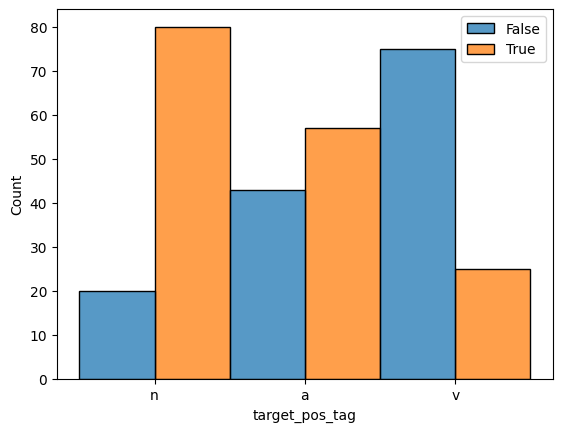

In [4]:
sns.histplot(data=df, x='target_pos_tag', hue=df.target_word == df.target_lemma, multiple='dodge')

In [5]:
from transformers import XLMRobertaTokenizer

tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-large")
tokenizer

PreTrainedTokenizer(name_or_path='xlm-roberta-large', vocab_size=250002, model_max_len=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True)})

In [6]:
def change_subst(s):
    # if len(s.split(' ')) > 1:
    #     return 'z'
    if len(tokenizer.encode(s, add_special_tokens=False)) > 1:
        return 'z'
    else:
        return s
    
def replace_manually(s, hint):
    return input(s + '-' + hint)

df['cheat_preds'] = df['gold_substitutes'].apply(lambda x: eval(x) + [f"z" for i in range(10 - len(eval(x)))])
df['cheat_preds'] = df['cheat_preds'].apply(lambda x: [change_subst(s) for s in x])
# df.loc[df.target_word != df.target_lemma, 'cheat_preds'] = df.loc[df.target_word != df.target_lemma,:].apply(lambda x: 
#     [replace_manually(t, ":".join([x.target_word, x.target_lemma])) if t != 'z' else 'z' for t in x['cheat_preds']]
# , axis=1)
df

,target_word,target_lemma,target_pos_tag,target_position,context,gap,gap_normalized,gap_vocab_normalized,precision,recall,...,prec@10,rec@10,f1@10,gold_substitutes,gold_weights,pred_substitutes,candidates,ranked_candidates,target_subtokens,cheat_preds
0,affection,affection,n,35,"[""les"", ""d\u00e9c\u00e8s"", ""s"", ""'"", ""y"", ""suc...",0.317460,0.437500,1.000000,0.002387,0.200000,...,0.1,0.200000,0.133333,"[""maladie"", ""mal"", ""pathologie"", ""\u00e9pid\u0...","[7.0, 3.0, 2.0, 1.0, 1.0]","[""maladie"", ""guerre"", ""mort"", ""dernier"", ""situ...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""maladie"", ""amiti\u00e9"", ""amour"", ""attention...",-1,"[maladie, mal, z, z, z, z, z, z, z, z]"
1,affection,affection,n,15,"[""A"", ""travers"", ""l"", ""'"", ""\u00e9preuve"", ""qu...",0.400829,0.456116,0.878788,0.004773,0.400000,...,0.1,0.200000,0.133333,"[""amour"", ""attachement"", ""tendresse"", ""lien"", ...","[7.0, 4.0, 3.0, 1.0, 1.0]","[""aide"", ""amour"", ""amiti\u00e9"", ""espoir"", ""in...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""amour"", ""amiti\u00e9"", ""attention"", ""conditi...",-1,"[z, z, z, lien, attention, z, z, z, z, z]"
2,affection,affection,n,11,"[""Bien"", ""s\u00fbr"", "","", ""personne"", ""ne"", ""p...",0.420354,0.468750,1.000000,0.004773,0.333333,...,0.2,0.333333,0.250000,"[""amour"", ""tendresse"", ""lien"", ""attention"", ""s...","[6.0, 4.0, 1.0, 1.0, 1.0, 1.0]","[""aide"", ""amour"", ""\u00e9ducation"", ""attention...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""amour"", ""attention"", ""amiti\u00e9"", ""conditi...",-1,"[z, z, lien, attention, z, proximité, z, z, z, z]"
3,Affection,affection,n,2,"[""Cataplexie"", "":"", ""Affection"", ""caract\u00e9...",0.398940,0.393064,0.843137,0.007160,0.428571,...,0.1,0.142857,0.117647,"[""maladie"", ""trouble"", ""probl\u00e8me"", ""syndr...","[4.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[""maladie"", ""douleur"", ""condition"", ""situation...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""maladie"", ""condition"", ""syndrome"", ""\u00e9ta...",-1,"[maladie, trouble, problème, syndrome, z, état..."
4,affection,affection,n,25,"[""L"", ""'"", ""occlusion"", ""de"", ""l"", ""'"", ""art\u...",0.276498,0.276498,1.000000,0.002387,0.200000,...,0.1,0.200000,0.133333,"[""maladie"", ""dysfonctionnement"", ""trouble"", ""p...","[3.0, 2.0, 1.0, 1.0, 1.0]","[""maladie"", ""infection"", ""r\u00e9action"", ""con...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""maladie"", ""condition"", ""amiti\u00e9"", ""amour...",-1,"[maladie, z, trouble, z, z, z, z, z, z, z]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,vaseuses,vaseux,a,5,"[""Encore"", ""que"", ""dans"", ""les"", ""baies"", ""vas...",0.000000,0.000000,NaN,0.000000,0.000000,...,0.0,0.000000,0.000000,"[""boueux"", ""mar\u00e9cageux"", ""limoneux"", ""bou...","[7.0, 3.0, 1.0, 1.0]","[""o\u00f9"", ""s"", ""que"", ""et"", ""ou"", ""de"", ""aus...","[""argileux"", ""barbouill\u00e9"", ""bidon"", ""blas...","[""vide"", ""mauvais"", ""noir"", ""nul"", ""obscur"", ""...",-1,"[z, z, z, z, z, z, z, z, z, z]"
296,vaseux,vaseux,a,9,"[""Il"", ""souffre"", ""\u00e9galement"", ""de"", ""mig...",0.000000,0.000000,NaN,0.000000,0.000000,...,0.0,0.000000,0.000000,"[""malade"", ""naus\u00e9eux"", ""fatigu\u00e9"", ""p...","[5.0, 4.0, 2.0, 1.0, 1.0, 1.0, 1.0]","[""mal"", ""bien"", ""tr\u00e8s"", ""mauvais"", ""mieux...","[""argileux"", ""barbouill\u00e9"", ""bidon"", ""blas...","[""mauvais"", ""triste"", ""vide"", ""noir"", ""nul"", ""...",-1,"[z, z, z, z, z, z, z, z, z, z]"
297,vaseux,vaseux,a,5,"[""Je"", ""me"", ""r\u00e9veille"", ""un"", ""peu"", ""va...",0.000000,0.000000,NaN,0.000000,0.000000,...,0.0,0.000000,0.000000,"[""fatigu\u00e9"", ""embrouill\u00e9"", ""patraque""...","[2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[""late"", ""ago"", ""s"", ""later"", ""\u00eatre"", ""fa...","[""argileux"", ""ba

In [12]:
df[df.target_word != df.target_lemma][['target_word', 'target_lemma', 'target_pos_tag', 'cheat_preds']].to_csv('for_manual_fix', sep='\t')

In [18]:
df

,target_word,target_lemma,target_pos_tag,target_position,context,gap,gap_normalized,gap_vocab_normalized,precision,recall,...,prec@10,rec@10,f1@10,gold_substitutes,gold_weights,pred_substitutes,candidates,ranked_candidates,target_subtokens,cheat_preds
0,affection,affection,n,35,"[""les"", ""d\u00e9c\u00e8s"", ""s"", ""'"", ""y"", ""suc...",0.317460,0.437500,1.000000,0.002387,0.200000,...,0.1,0.200000,0.133333,"[""maladie"", ""mal"", ""pathologie"", ""\u00e9pid\u0...","[7.0, 3.0, 2.0, 1.0, 1.0]","[""maladie"", ""guerre"", ""mort"", ""dernier"", ""situ...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""maladie"", ""amiti\u00e9"", ""amour"", ""attention...",-1,"[maladie, mal, z, z, z, z, z, z, z, z]"
1,affection,affection,n,15,"[""A"", ""travers"", ""l"", ""'"", ""\u00e9preuve"", ""qu...",0.400829,0.456116,0.878788,0.004773,0.400000,...,0.1,0.200000,0.133333,"[""amour"", ""attachement"", ""tendresse"", ""lien"", ...","[7.0, 4.0, 3.0, 1.0, 1.0]","[""aide"", ""amour"", ""amiti\u00e9"", ""espoir"", ""in...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""amour"", ""amiti\u00e9"", ""attention"", ""conditi...",-1,"[z, z, z, lien, attention, z, z, z, z, z]"
2,affection,affection,n,11,"[""Bien"", ""s\u00fbr"", "","", ""personne"", ""ne"", ""p...",0.420354,0.468750,1.000000,0.004773,0.333333,...,0.2,0.333333,0.250000,"[""amour"", ""tendresse"", ""lien"", ""attention"", ""s...","[6.0, 4.0, 1.0, 1.0, 1.0, 1.0]","[""aide"", ""amour"", ""\u00e9ducation"", ""attention...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""amour"", ""attention"", ""amiti\u00e9"", ""conditi...",-1,"[z, z, lien, attention, z, proximité, z, z, z, z]"
3,aisés,aisé,a,2,"[""Cataplexie"", "":"", ""Affection"", ""caract\u00e9...",0.398940,0.393064,0.843137,0.007160,0.428571,...,0.1,0.142857,0.117647,"[""maladie"", ""trouble"", ""probl\u00e8me"", ""syndr...","[4.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[""maladie"", ""douleur"", ""condition"", ""situation...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""maladie"", ""condition"", ""syndrome"", ""\u00e9ta...",-1,"['riches', 'z', 'z', 'z', 'z', 'z', 'z', 'z', ..."
4,affection,affection,n,25,"[""L"", ""'"", ""occlusion"", ""de"", ""l"", ""'"", ""art\u...",0.276498,0.276498,1.000000,0.002387,0.200000,...,0.1,0.200000,0.133333,"[""maladie"", ""dysfonctionnement"", ""trouble"", ""p...","[3.0, 2.0, 1.0, 1.0, 1.0]","[""maladie"", ""infection"", ""r\u00e9action"", ""con...","[""affaiblissement"", ""amiti\u00e9"", ""amour"", ""a...","[""maladie"", ""condition"", ""amiti\u00e9"", ""amour...",-1,"[maladie, z, trouble, z, z, z, z, z, z, z]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,NaN,NaN,5,"[""Encore"", ""que"", ""dans"", ""les"", ""baies"", ""vas...",0.000000,0.000000,NaN,0.000000,0.000000,...,0.0,0.000000,0.000000,"[""boueux"", ""mar\u00e9cageux"", ""limoneux"", ""bou...","[7.0, 3.0, 1.0, 1.0]","[""o\u00f9"", ""s"", ""que"", ""et"", ""ou"", ""de"", ""aus...","[""argileux"", ""barbouill\u00e9"", ""bidon"", ""blas...","[""vide"", ""mauvais"", ""noir"", ""nul"", ""obscur"", ""...",-1,NaN
296,vaseux,vaseux,a,9,"[""Il"", ""souffre"", ""\u00e9galement"", ""de"", ""mig...",0.000000,0.000000,NaN,0.000000,0.000000,...,0.0,0.000000,0.000000,"[""malade"", ""naus\u00e9eux"", ""fatigu\u00e9"", ""p...","[5.0, 4.0, 2.0, 1.0, 1.0, 1.0, 1.0]","[""mal"", ""bien"", ""tr\u00e8s"", ""mauvais"", ""mieux...","[""argileux"", ""barbouill\u00e9"", ""bidon"", ""blas...","[""mauvais"", ""triste"", ""vide"", ""noir"", ""nul"", ""...",-1,"[z, z, z, z, z, z, z, z, z, z]"
297,vaseux,vaseux,a,5,"[""Je"", ""me"", ""r\u00e9veille"", ""un"", ""peu"", ""va...",0.000000,0.000000,NaN,0.000000,0.000000,...,0.0,0.000000,0.000000,"[""fatigu\u00e9"", ""embrouill\u00e9"", ""patraque""...","[2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[""late"", ""ago"", ""s"", ""later"", ""\u00eatre"", ""fa...","[""argileux"", ""barbouill\u00e9"", ""bidon"", ""blas...","[""v

In [19]:
pd.read_csv('for_manual_fix', sep='\t')

,Unnamed: 0,target_word,target_lemma,target_pos_tag,cheat_preds
0,3,Affection,affection,n,"['Maladie', 'Trouble', 'Problème', 'Syndrome',..."
1,10,aisés,aisé,a,"['riches', 'z', 'nanti', 'z', 'z', 'z', 'z', '..."
2,11,aisée,aisé,a,"['riche', 'z', 'z', 'z', 'z', 'nanti', 'z', 'z..."
3,12,aisés,aisé,a,"['riches', 'z', 'z', 'z', 'z', 'z', 'z', 'z', ..."
4,13,aisée,aisé,a,"['facile', 'simple', 'directe', 'pratique', 'z..."
...,...,...,...,...,...
133,287,vaisseaux,vaisseau,n,"['z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', ..."
134,290,vaseuses,vaseux,a,"['z', 'mauvais', 'z', 'nul', 'z', 'z', 'z', 'z..."
135,294,vaseuse,vaseux,a,"['z', 'z', 'mauvais', 'z', 'z', 'z', 'z', 'las..."
136,295,vaseuses,vaseux,a,"['z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z', ..."


In [20]:
df.loc[df.target_word != df.target_lemma, ['target_word', 'target_lemma', 'target_pos_tag', 'cheat_preds']] = pd.read_csv('for_manual_fix', sep='\t', index_col=0)
df.loc[df.target_word != df.target_lemma,'cheat_preds'] = df.loc[df.target_word != df.target_lemma,'cheat_preds'].apply(lambda x: eval(x))
df.loc[df.target_word != df.target_lemma,'cheat_preds'] = df.loc[df.target_word != df.target_lemma,'cheat_preds'].apply(lambda x: [change_subst(s) for s in x])

In [21]:
scores = pd.DataFrame.from_records(df.apply(lambda s: compute_precision_recall_f1_topk(gold_substitutes=eval(s['gold_substitutes']), pred_substitutes=s['cheat_preds'], topk_list=(1, 3, 10)), axis=1))
scores


['maladie', 'mal', 'pathologie', 'épidémie', 'fléau']
['maladie', 'mal', 'z', 'z', 'z', 'z', 'z', 'z', 'z', 'z']
['amour', 'attachement', 'tendresse', 'lien', 'attention']
['z', 'z', 'z', 'lien', 'attention', 'z', 'z', 'z', 'z', 'z']
['amour', 'tendresse', 'lien', 'attention', 'sollicitation', 'proximité']
['z', 'z', 'lien', 'attention', 'z', 'proximité', 'z', 'z', 'z', 'z']
['maladie', 'trouble', 'problème', 'syndrome', 'pathologie', 'état', 'anomalie']
['z', 'z', 'z', 'z', 'z', 'état', 'z', 'z', 'z', 'z']
['maladie', 'dysfonctionnement', 'trouble', 'pathologie', 'atteinte']
['maladie', 'z', 'trouble', 'z', 'z', 'z', 'z', 'z', 'z', 'z']
['maladie', 'trouble', 'maux', 'mal', 'syndrome', 'affaiblissement', 'pathologie', 'anomalie', 'atteinte']
['maladie', 'trouble', 'z', 'mal', 'syndrome', 'z', 'z', 'z', 'z', 'z']
['maladie', 'trouble', 'pathologie', 'mal', 'dysfonctionnement', 'problème', 'condition']
['maladie', 'trouble', 'z', 'mal', 'z', 'problème', 'condition', 'z', 'z', 'z']
['amo

,prec@1,rec@1,f1@1,prec@3,rec@3,f1@3,prec@10,rec@10,f1@10
0,1.0,0.2,0.333333,0.666667,0.400000,0.500000,0.2,0.400000,0.266667
1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.2,0.400000,0.266667
2,0.0,0.0,0.000000,0.333333,0.166667,0.222222,0.3,0.500000,0.375000
3,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.1,0.142857,0.117647
4,1.0,0.2,0.333333,0.666667,0.400000,0.500000,0.2,0.400000,0.266667
...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
296,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
297,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.1,0.071429,0.083333
298,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.2,0.181818,0.190476


In [22]:
run_name = 'no_23masks'
metrics = scores.mean().to_dict()
metrics

{'prec@1': 0.37,
 'rec@1': 0.05963688163688163,
 'f1@1': 0.10072349872349871,
 'prec@3': 0.3144444444444444,
 'rec@3': 0.15170173345173343,
 'f1@3': 0.19831675078733904,
 'prec@10': 0.19466666666666668,
 'rec@10': 0.28441417787006024,
 'f1@10': 0.22474946024222503}

In [53]:

import mlflow
from mlflow.utils.mlflow_tags import MLFLOW_RUN_NAME

mlflow.set_tracking_uri('../mlruns/')
mlflow.set_experiment('fr_clean')
with mlflow.start_run(run_name=run_name):
    for key, value in metrics.items():
        key = key.replace("@", "_")
        mlflow.log_metric(key, value)